In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import ImageCollection, imread, imshow
import skimage.data as data
import skimage.segmentation as seg
from skimage import morphology as morph
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage.future import graph
from skimage.feature import canny, peak_local_max
from skimage import measure, util
from scipy import ndimage as ndi
%matplotlib inline

In [2]:
images = ImageCollection('images/*.jpg:images/*.jpg')

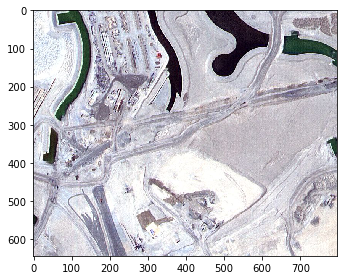

In [86]:
image = imread(images.files[0])
imshow(image)

# Region-Based segmentation

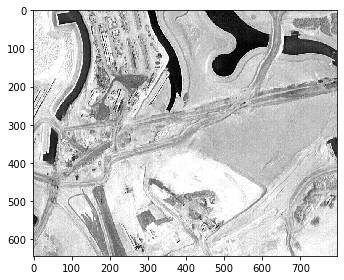

In [4]:
gimage = color.rgb2gray(image)
imshow(gimage)

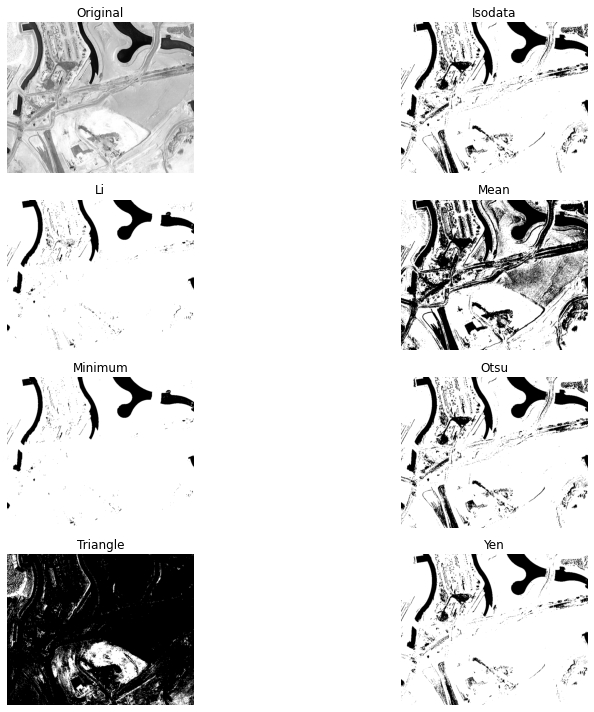

In [5]:
fig, ax = filters.try_all_threshold(gimage, figsize=(14, 10), verbose=False)
plt.show()

## Local Threshold

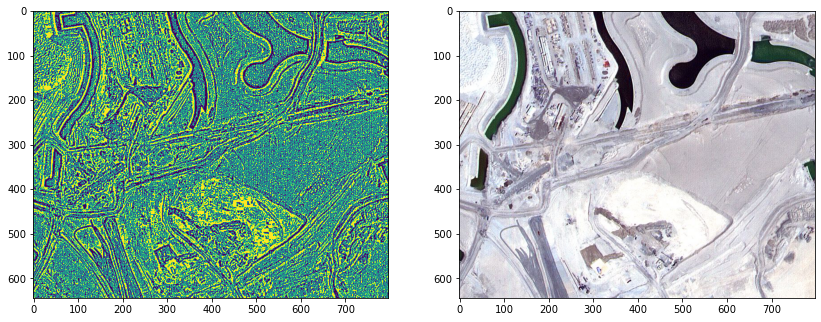

In [6]:
threshold = filters.threshold_local(gimage, block_size = 15)
fig, ax = plt.subplots(1,2, figsize = (14, 10))
ax[0].imshow(gimage > threshold)
ax[1].imshow(image)
plt.show()

In [82]:
dimage = filters.rank.median(gimage, morph.disk(2))
markers = filters.rank.gradient(dimage, morph.disk(4)) < 10
markers = ndi.label(markers)[0]
gradient = filters.rank.gradient(dimage, morph.disk(4))
segmentation = seg.watershed(gradient, markers, mask = gimage)

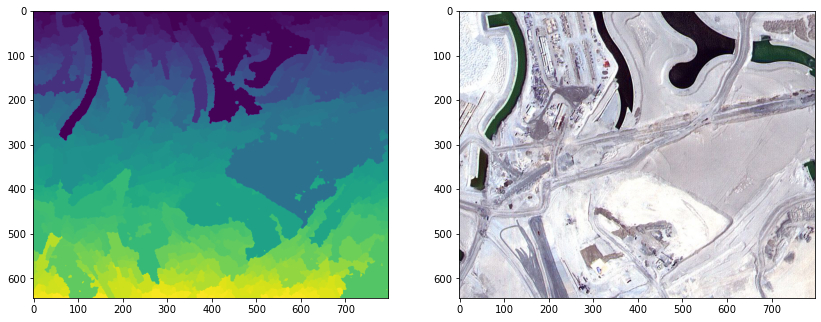

In [83]:
fig, ax = plt.subplots(1,2, figsize = (14, 10))
ax[0].imshow(segmentation)
ax[1].imshow(image)
plt.show()

## HSV Segmentation

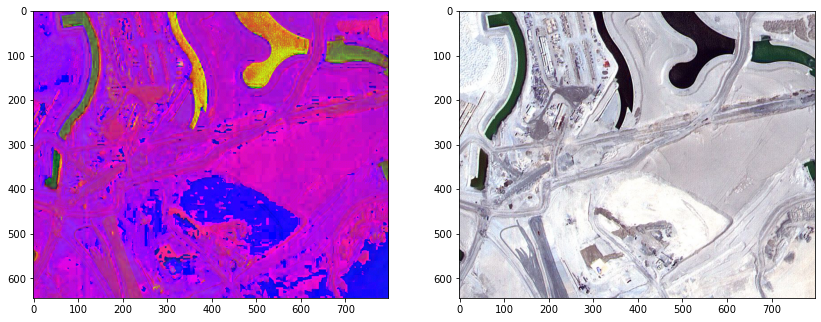

In [9]:
fig, ax = plt.subplots(1,2, figsize = (14, 10))
ax[0].imshow(color.rgb2hsv(image))
ax[1].imshow(image)
plt.show()

# Edge based segmentation

## Sobel Edge Detector

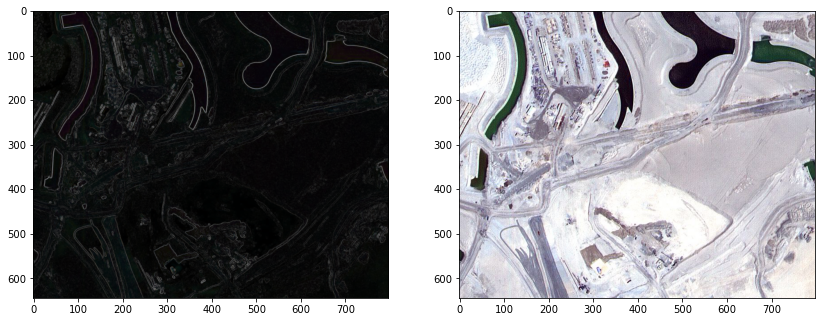

In [10]:
fig, ax = plt.subplots(1,2, figsize = (14, 10))
ax[0].imshow(filters.sobel(image))
ax[1].imshow(image)
plt.show()

## Canny Edge Detector

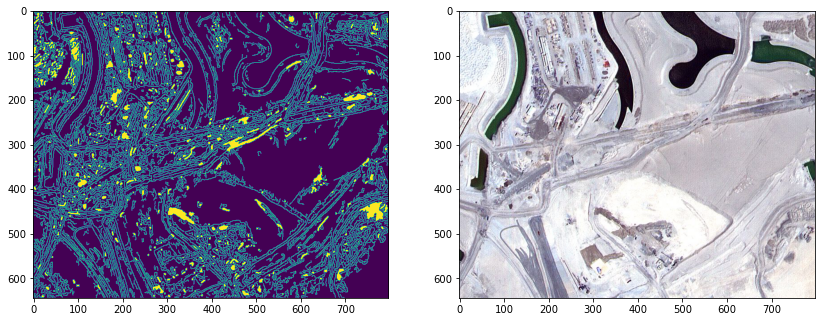

In [11]:
fig, ax = plt.subplots(1,2, figsize = (14, 10))
ax[0].imshow(ndi.binary_fill_holes(canny(gimage)).astype('uint8'))
ax[1].imshow(image)
plt.show()

# Cluster-Based segmentation

## SLIC

In [12]:
mask = morph.remove_small_holes(
    morph.remove_small_objects(
        gimage < 0.7, 300),
    500)

In [13]:
m_slic = seg.slic(image, n_segments=100, mask=mask, start_label=1)

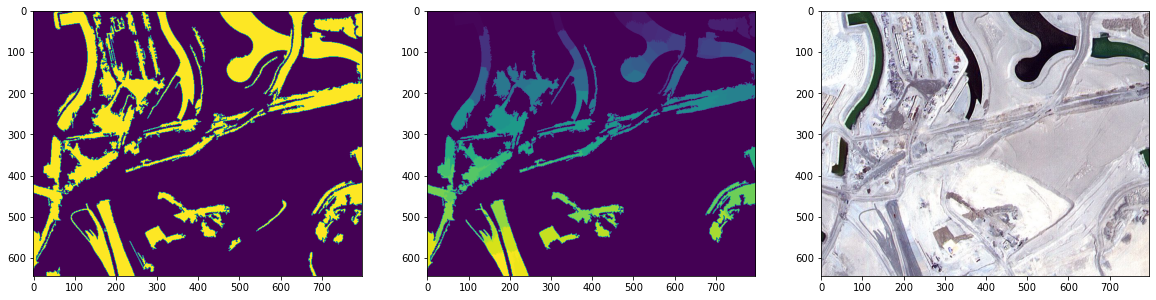

In [14]:
fig, ax = plt.subplots(1,3, figsize = (20, 20))
ax[0].imshow(mask)
ax[1].imshow(m_slic)
ax[2].imshow(image)
plt.show()